#Homework #3 Fabián Gómez y Andrea Exarahi

We will evaluate the Iris Flowers Dataset with 3 diferent algorithm:


1.   Nearest Neighbor
2.   Naive Bayes Classifier
3.   Decision Trees
4.  Ensemble Model - Ada Boost


We will follow the next steps in order to acomplish that:
1.  Get Data  (Same for all the algorithms)
2.  Preprosessing Data (Same for all the algorithms)
3.  Train Model
4.  Test Data.
5.   Improve- Using HyperParameters

And finally we will present some conclusions from the research.

#About the Iris Flowers Dataset


The Iris Flowers Dataset involves predicting the flower species given measurements of iris flowers.

It is a multi-class classification problem. The number of observations for each class is balanced. There are 150 observations with 4 input variables and 1 output variable. The variable names are as follows:

1.  Sepal length in cm.
2.  Sepal width in cm.
3.  Petal length in cm.
4.  Petal width in cm.
5.  Class (Iris Setosa, Iris Versicolour, Iris Virginica).

Took data set and description problem from: https://machinelearningmastery.com/standard-machine-learning-datasets/

##Dependencies

In [0]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn. ensemble import BaggingClassifier, AdaBoostClassifier #For Classification
from sklearn. ensemble import VotingClassifier

#Configuration Variables

In [0]:
vRandomSeed = 21
vTest_Size = 0.30#%

##Step One - Get Data (Same for all the algorithms)

In [0]:
vData = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

Cheking Data was successfully loaded

In [0]:
vData.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Adding columns names and Checking everything fine

In [0]:
vData = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
vData.columns = ["SepalLength(cm)", "SepalWidth(cm)", "PetalLength(cm)", "PetalWidth(cm)","Class"]
vData.head()

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step Two - Preprosessing Data (Same for all the algorithms)

Checking basic description of data Set

In [0]:
vData.shape

(150, 5)

In [0]:
vData.describe()

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking max values and min values from Columns, is good to check this to determinate how good can be the standarize or normalization

In [0]:
vData.max()

SepalLength(cm)               7.9
SepalWidth(cm)                4.4
PetalLength(cm)               6.9
PetalWidth(cm)                2.5
Class              Iris-virginica
dtype: object

In [0]:
vData.min()

SepalLength(cm)            4.3
SepalWidth(cm)               2
PetalLength(cm)              1
PetalWidth(cm)             0.1
Class              Iris-setosa
dtype: object

Checking if there is any null valueson the Data Set

In [0]:
vData.isnull().values.any()

False

Checking possible values for Class Category

In [0]:
vData.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Changing Class Category to numbers

In [0]:
vData['Class']=vData['Class'].replace({'Iris-setosa': 0, 'Iris-versicolor' :1,'Iris-virginica':2})

Separate Data between X Data and Y Data

In [0]:
vX_Data = vData[["SepalLength(cm)", "SepalWidth(cm)", "PetalLength(cm)", "PetalWidth(cm)"]]
vY_Data = vData[['Class']]

Now, is time to split the Data in Training and Test 

In [0]:
vX_Data_Train, vX_Data_Test, vY_Data_Train, vY_Data_Test = train_test_split(vX_Data,vY_Data, random_state=vRandomSeed,test_size=vTest_Size)

Now we are going to standarized the X Data, there is not going to be a big diference because the type of the X Data is all representing in centimeters and the values are from 0.1 to 7.9  however it will improve a bit our results and is a good practice as well.

***Important: Im going to use the same criteria that got from standarize the Train X Data to the Test X Data, is named adove as: vStandarizeCriteria

For more information look this link: 
https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029

In [0]:
vStandarizeCriteria = preprocessing.StandardScaler().fit(vX_Data_Train)

Standarize Train Data

In [0]:
vScaled_X_Data_Train = vStandarizeCriteria.transform(vX_Data_Train)
vX_Data_Train = pd.DataFrame(vScaled_X_Data_Train, columns=vX_Data.columns)
vX_Data_Train.head()

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm)
0,-0.421295,1.072915,-1.358921,-1.267484
1,-1.129071,0.110043,-1.247751,-1.397197
2,-1.836847,-0.130676,-1.470091,-1.397197
3,0.404443,-2.056420,0.419799,0.418789
4,-1.247034,0.832197,-1.192166,-1.267484


Standarize Test Data

In [0]:
vScaled_X_Data_Test = vStandarizeCriteria.transform(vX_Data_Test)
vX_Data_Test = pd.DataFrame(vScaled_X_Data_Test, columns=vX_Data.columns)
vX_Data_Test.head()

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm)
0,-0.067407,-1.093548,0.141874,0.029649
1,-0.893146,1.795069,-1.025411,-1.008058
2,-1.011108,0.832197,-1.247751,-1.267484
3,-0.893146,1.554351,-1.247751,-1.008058
4,-0.185370,-0.130676,0.253044,0.029649


##Step Three (Cycle of Train Model - Test Data - Improve) for Naive Bayes Classifier

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability. Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

Took description from: https://medium.com/@Mandysidana/machine-learning-types-of-classification-9497bd4f2e14

In [0]:
nbg = GaussianNB().fit(vX_Data_Train, vY_Data_Train.values.ravel())
print("Training set score: {:.3f}".format(nbg.score(vX_Data_Train, vY_Data_Train.values.ravel())))
print("Test set score: {:.3f}".format(nbg.score(vX_Data_Test, vY_Data_Test.values.ravel())))

Training set score: 0.962
Test set score: 0.956


We didnt find relevant hyper parameter configuration for the Gaussian Naive Bayes. However the score in both training and test data is very good.

##Step Three (Cycle of Train Model - Test Data - Improve) for Nearest Neighbor
The k-nearest-neighbors algorithm is a classification algorithm, and it is supervised: it takes a bunch of labelled points and uses them to learn how to label other points. To label a new point, it looks at the labelled points closest to that new point (those are its nearest neighbors), and has those neighbors vote, so whichever label the most of the neighbors have is the label for the new point (the “k” is the number of neighbors it checks).

Took description from: https://medium.com/@Mandysidana/machine-learning-types-of-classification-9497bd4f2e14

Setting up the Neighbors_setting HyperParameters with 15

In [0]:
#List inicialization

vTraining_Accuracy = []
vTest_Accuracy = []

neighbors_settings = range(1, 30)
for n_neighbors in neighbors_settings:
    # Classification model build
    vKNN = KNeighborsClassifier(n_neighbors=n_neighbors)
    vKNN.fit(vX_Data_Train, vY_Data_Train.values.ravel())
    # Training set accuracy load
    vTraining_Accuracy.append(vKNN.score(vX_Data_Train, vY_Data_Train))
    # Spread accuracy load
    vTest_Accuracy.append(vKNN.score(vX_Data_Test, vY_Data_Test))


Showing the accuracy of the model with actual settings

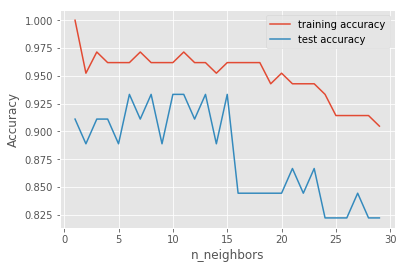

In [0]:
#scikit-learn kNN

plt.style.use('ggplot')
%matplotlib inline

plt.plot(neighbors_settings, vTraining_Accuracy, label="training accuracy")
plt.plot(neighbors_settings, vTest_Accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Looks like 11 neighbors is good setup to this data set, the training data got 97% accuaracy and 93% with the test data. 

##Step Three (Cycle of Train Model - Test Data - Improve) for Decision Trees
Decision tree builds classification or regression models in the form of a tree structure. It breaks down a data set into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches and a leaf node represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

Took description from: https://medium.com/@Mandysidana/machine-learning-types-of-classification-9497bd4f2e14

Setting up the Decision Tree Classifier HyperParameters

In [0]:
vTraining_Accuracy = []
vTest_Accuracy = []

max_depth_settings = range(1, 7)
for max_depth in max_depth_settings:
    # Classification model build
    vTDM = DecisionTreeClassifier(max_depth = max_depth)
    vTDM.fit(vX_Data_Train, vY_Data_Train)
    # Training set accuracy load
    vY_Predict = vTDM.predict(vX_Data_Test)
    # Spread accuracy load
    vTest_Accuracy.append(accuracy_score(vY_Data_Test, vY_Predict))
    
    
    # Training set accuracy load
    vY_Predict = vTDM.predict(vX_Data_Train)
    vTraining_Accuracy.append(accuracy_score(vY_Data_Train, vY_Predict))



Showing the accuracy of the model with actual settings

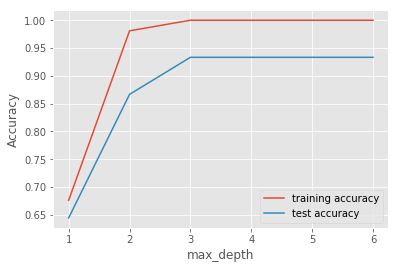

In [0]:
plt.style.use('ggplot')
%matplotlib inline

plt.plot(max_depth_settings, vTraining_Accuracy, label="training accuracy")
plt.plot(max_depth_settings, vTest_Accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

After max_depth=3 , the results are the same. Thats is because we are working with a dataSet with 4 dimensions on the X.

## Step Three (Cycle of Train Model - Test Data - Improve) for AdaBoost - Ensemble Model
The process of generating models from data is called learning or training and the learned model can be called as hypothesis or learner. The learning algorithms which construct a set of classifiers and then classify new data points by taking a choice of their predictions are known as Ensemble methods.

It has been discovered that ensembles are often much more accurate than the individual classifiers which make them up. The ensemble methods, also known as committee-based learning or learning multiple classifier systems train multiple hypotheses to solve the same problem. One of the most common examples of ensemble modelling is the random forest trees where a number of decision trees are used to predict outcomes.

Took description from: https://www.analyticsindiamag.com/basics-of-ensemble-learning-in-classification-techniques-explained/

Soo in simple words, it tries to combines diferents or same algorithms and aplying diferents configuration to get a better accuaricy from the problem.

###AdaBoost (Adaptive Boosting)

The term ‘Boosting’ refers to a family of algorithms which converts weak learner to strong learners.

It fits a sequence of weak learners on different weighted training data. It starts by predicting original data set and gives equal weight to each observation. If prediction is incorrect using the first learner, then it gives higher weight to observation which have been predicted incorrectly. Being an iterative process, it continues to add learner(s) until a limit is reached in the number of models or accuracy.

Mostly, we use decision stamps with AdaBoost. But, we can use any machine learning algorithms as base learner if it accepts weight on training data set. We can use AdaBoost algorithms for both classification and regression problem.

Took description from: https://towardsdatascience.com/ensemble-learning-in-machine-learning-getting-started-4ed85eb38e00



In [0]:



clf = AdaBoostClassifier(n_estimators=100, base_estimator=DecisionTreeClassifier(),learning_rate=1)
#Above I have used decision tree as a base estimator, you can use any ML learner as base estimator if it accepts sample weight 
clf.fit(vX_Data_Train,vY_Data_Train.values.ravel())
clf.score(vX_Data_Test,vY_Data_Test.values.ravel())


vTraining_Accuracy = []
vTest_Accuracy = []

vN_estimators = range(100, 1000,100)
for vActual_Estimator in vN_estimators:
    vModel = AdaBoostClassifier(n_estimators=vActual_Estimator, base_estimator=DecisionTreeClassifier(),learning_rate=1)

    vModel.fit(vX_Data_Train,vY_Data_Train.values.ravel())
    
    #Evaluate Using Test data
    vTest_Accuracy.append(clf.score(vX_Data_Test,vY_Data_Test.values.ravel()))
    
    
    #Evaluate Using Training data
    vTraining_Accuracy.append(clf.score(vX_Data_Train,vY_Data_Train.values.ravel()))


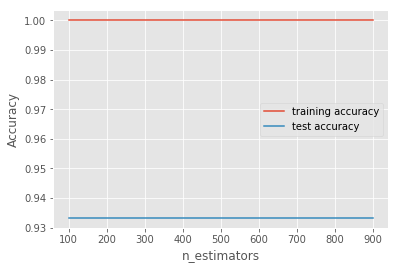

In [0]:
plt.style.use('ggplot')
%matplotlib inline

plt.plot(vN_estimators, vTraining_Accuracy, label="training accuracy")
plt.plot(vN_estimators, vTest_Accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

Because AdaBoost works with Trees as well , theres not an improve changing Hyperparameter estimator, because the small amout of features.

##Conclusions


*   Trees algorithms and hyper parameters configuration makes more sense when we are dealing with lots of features. Still with a basic configuration with 3 depth we got a good result.
*   Normalization and Standarization is with a small scale of numbers is not a big improve, however its helps like in the case of the Irish Flower Problem that the features are in CM with similar values between 0.1 - 7.9  . I would definitely recommend it when the scales of each feature is very diferent.
*   In the Nearest Neighbor algorithm the most we set in the Neighbor´s hyperparameter it gets worst and worst. I´ll say that happens after Neighbor=15 because the nature of our data with small amouts of features.
*  In our next investigation we will definetly use a dataset with more features so whe can get more interesenting results and if we want to see the behavior with small and configurations to set.
